In [523]:
import re
import time
import math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats


In [588]:
# Load data
ess_df = pd.read_csv('C:/Users/keith/Desktop/Thinkful/ESSdata_Thinkful.csv',encoding = "ISO-8859-1")
 

In [590]:
ess_df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [527]:
ess_df.shape

(8594, 13)

In [528]:
ess_df.isnull().sum()/ess_df.shape[0]

cntry      0.000000
idno       0.000000
year       0.000000
tvtot      0.000931
ppltrst    0.001629
pplfair    0.004538
pplhlp     0.002909
happy      0.003607
sclmeet    0.001745
sclact     0.010938
gndr       0.001164
agea       0.027810
partner    0.001978
dtype: float64

We have several missing values but it doesn't look like we will be missing much data if we drop those rows but we'll deal with them as the come up in questions.


In [529]:
ess_df.dtypes

cntry       object
idno       float64
year         int64
tvtot      float64
ppltrst    float64
pplfair    float64
pplhlp     float64
happy      float64
sclmeet    float64
sclact     float64
gndr       float64
agea       float64
partner    float64
dtype: object

In [530]:
ess_df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [531]:
ess_df.year.unique()    

array([6, 7], dtype=int64)

All of the questions have to do with specific years so I'm dividing the data frame into the respective years.

In [532]:
_2012_df = ess_df[ess_df.year==6].copy()
_2012_df.index = range(len(_2012_df))
_2014_df = ess_df[ess_df.year==7].copy()
_2014_df.index = range(len(_2014_df))

In [533]:
print(_2012_df.shape)
print(_2014_df.shape)

(4297, 13)
(4297, 13)


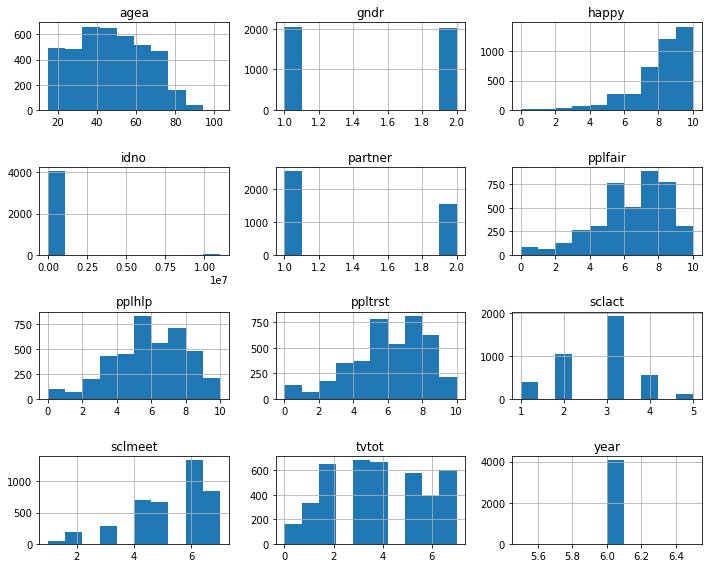

In [534]:
_2012_df.dropna().hist(figsize=(10,8))
plt.tight_layout()
plt.show()

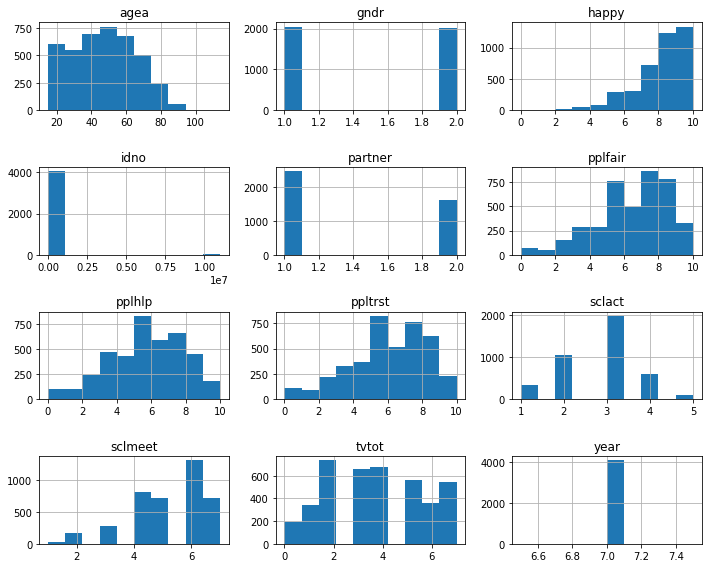

In [535]:
_2014_df.dropna().hist(figsize=(10,8))
plt.tight_layout()
plt.show()

## <b>Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.


Since we are comparing the same people just at different times we need to use a paired t test.

In [536]:
# dropping the same indicies from each so we can perform paired tests if needed
drop_index = np.where(_2014_df.ppltrst.isna()|(_2012_df.ppltrst.isna()))[0]
drop_index

_2012_df.drop(drop_index,0,inplace=True)
_2012_df.index=range(len(_2012_df))
_2014_df.drop(drop_index,0,inplace=True)
_2014_df.index=range(len(_2014_df))

In [537]:
# create data frames for each country in the year 2012
def cntry_df_2012(cntry): 
    df = _2012_df.copy()
    df = df.iloc[np.where(df.cntry==cntry)[0],:]
    return df;

ch_df12 = cntry_df_2012("CH")
cz_df12 = cntry_df_2012("CZ")
de_df12 = cntry_df_2012("DE")
es_df12 = cntry_df_2012("ES")
no_df12 = cntry_df_2012("NO")
se_df12 = cntry_df_2012("SE")

In [538]:
# create data frames for each country in the year 2014

def cntry_df_2014(cntry): 
    df = _2014_df.copy()
    df = df.iloc[np.where(df.cntry==cntry)[0],:]
    return df;

ch_df14 = cntry_df_2014("CH")
cz_df14 = cntry_df_2014("CZ")
de_df14 = cntry_df_2014("DE")
es_df14 = cntry_df_2014("ES")
no_df14 = cntry_df_2014("NO")
se_df14 = cntry_df_2014("SE")

One of the assumptions of the paired ttest is that there are no outliers so first we'll check for those

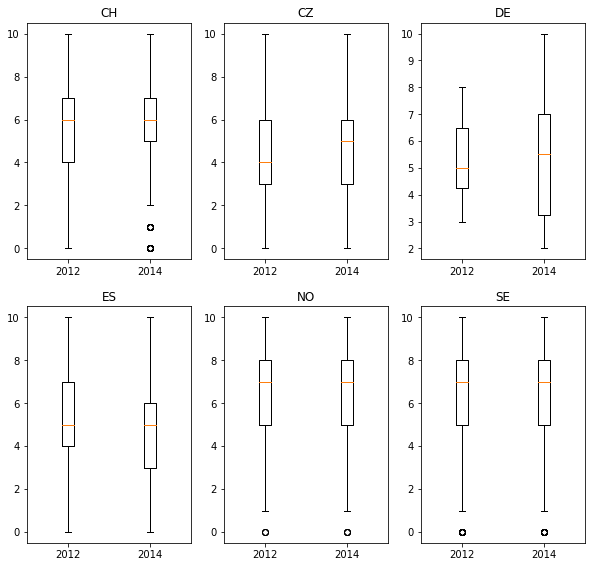

In [539]:

plt.figure(figsize=(10,20))
for i , cntry in enumerate(_2012_df.cntry.unique()):
    plt.subplot(4,3,i+1)
   # plt.title(str(cntry.cntry.unique()))
    plt.boxplot([_2012_df[_2012_df.cntry==cntry].ppltrst,_2014_df[_2014_df.cntry==cntry].ppltrst],labels=[2012,2014])
    plt.title(cntry)
plt.show()

It looks like there may be a few outliers but lets check the other assumptions first. We will use a Shapiro test to test the norality of the differences of the groups of each country.

In [540]:
for i ,cntry in enumerate(ess_df.cntry.unique()):     
    trust_diff = _2014_df[_2014_df.cntry==cntry].ppltrst - list(_2012_df[_2012_df.cntry==cntry].ppltrst)
    print(cntry)
    print(stats.shapiro(trust_diff))

CH
(0.9900428652763367, 4.288393029128201e-05)
CZ
(0.9906443357467651, 0.00038316231803037226)
DE
(0.9438660740852356, 0.4700844883918762)
ES
(0.9890597462654114, 7.377879285286326e-08)
NO
(0.9809293746948242, 3.806782089554872e-08)
SE
(0.9873186945915222, 4.637965957954293e-07)


According to the Shapiro test the only distribution that is normal is the ppltrst from Germany. This means we need to find another test. In this case we will use the Wilcoxon signed-rank test.

In [541]:
for i, cntry in enumerate(ess_df.cntry.unique()):
    print(cntry)
    print(stats.wilcoxon(_2014_df[_2014_df.cntry==cntry].ppltrst,_2012_df[_2012_df.cntry==cntry].ppltrst))

CH
WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)
CZ
WilcoxonResult(statistic=82837.0, pvalue=0.6224236775351153)
DE
WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)
ES
WilcoxonResult(statistic=243475.5, pvalue=0.007543148076429581)
NO
WilcoxonResult(statistic=85392.0, pvalue=0.7167060511447833)
SE
WilcoxonResult(statistic=130719.5, pvalue=0.03831183607893985)


According to the test, Spain and Sweden are the only two countries with differences in trust so next well see if that difference is negative or positive.

In [542]:
stats.ttest_rel(de_df14.ppltrst,de_df12.ppltrst)

Ttest_relResult(statistic=0.18399501804849683, pvalue=0.8568563797095805)

In [543]:
print('Spain diff',es_df14.ppltrst.mean() - es_df12.ppltrst.mean())
print('Sweden diff',se_df14.ppltrst.mean() - se_df12.ppltrst.mean())

Spain diff -0.2171758876961185
Sweden diff 0.1986754966887414


People in Spain reported to be more trusting in 2014 than in 2012 and people in Sweden reported to be less trusting in 2014 that in 2012.

## <b>Did people become happier from 2012 to 2014? Compute results for each country in the sample.


We will have to follow a similar path that we did for the first question since it is pretty much the same question.

In [544]:
np.where(_2014_df.happy.isna()|(_2012_df.happy.isna()))[0]

array([ 174,  203,  624,  807,  810,  811,  829,  837,  879,  916,  931,
        944, 1010, 1013, 1033, 1055, 1147, 1148, 1149, 1232, 1390, 1768,
       1930, 2811, 3037, 3280, 3399, 3419, 3602, 3807], dtype=int64)

In [545]:
# dropping the same indicies from each so we can perform paired tests if needed
drop_index = np.where(_2014_df.happy.isna()|(_2012_df.happy.isna()))[0]
drop_index

_2012_df.drop(drop_index,0,inplace=True)
_2014_df.drop(drop_index,0,inplace=True)

In [546]:
_2012_df.index = range(len(_2012_df))
_2014_df.index = range(len(_2014_df))

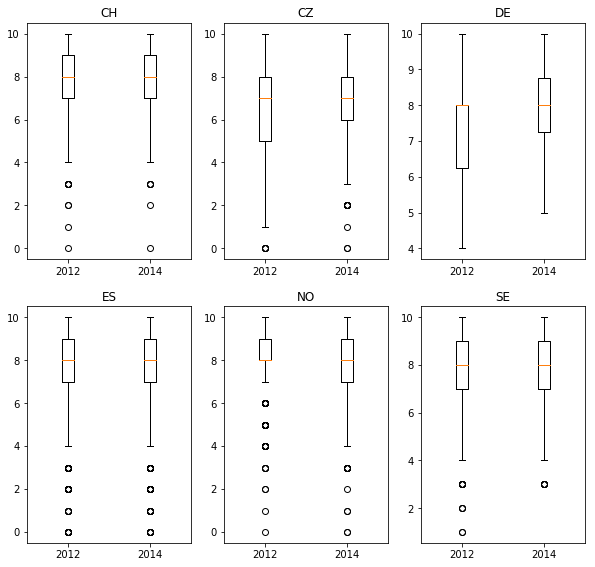

In [547]:

plt.figure(figsize=(10,20))
for i , cntry in enumerate(_2012_df.cntry.unique()):
    plt.subplot(4,3,i+1)
   # plt.title(str(cntry.cntry.unique()))
    plt.boxplot([_2012_df[_2012_df.cntry==cntry].happy,_2014_df[_2014_df.cntry==cntry].happy],labels=[2012,2014])
    plt.title(cntry)
plt.show()

In [548]:
# Shapiro test for normality
for i ,cntry in enumerate(ess_df.cntry.unique()):     
    trust_diff = _2014_df[_2014_df.cntry==cntry].happy - list(_2012_df[_2012_df.cntry==cntry].happy)
    print(cntry)
    print(stats.shapiro(trust_diff))

CH
(0.965677797794342, 1.828886000976304e-12)
CZ
(0.9872879981994629, 2.633933581819292e-05)
DE
(0.9687155485153198, 0.8590124249458313)
ES
(0.9810788631439209, 1.8139089189017632e-11)
NO
(0.9637861847877502, 2.0606441900050676e-12)
SE
(0.9766537547111511, 7.740216800833366e-11)


According to the Shapiro test most of the differences are normal but we do have a significant amount of outliers so again we will use the Wilcoxon test.

In [549]:
for i, cntry in enumerate(ess_df.cntry.unique()):
    print(cntry)
    print(stats.wilcoxon(_2014_df[_2014_df.cntry==cntry].happy,_2012_df[_2012_df.cntry==cntry].happy))

CH
WilcoxonResult(statistic=92816.5, pvalue=0.989517215264762)
CZ
WilcoxonResult(statistic=71130.0, pvalue=0.14333449329337802)
DE
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
ES
WilcoxonResult(statistic=231577.5, pvalue=0.06409039439844563)
NO
WilcoxonResult(statistic=67251.5, pvalue=7.969441632734971e-06)
SE
WilcoxonResult(statistic=125415.5, pvalue=0.7322285666838898)


In [550]:
# change in NO happiness from 2012 to 2014
no_df14.happy.mean()-no_df12.happy.mean()

-0.33574238456393335

It appears that Norway is the only country that had a significant change and that change was negative meaning that the people of norway reported to be less happy.

## <b>Who reported watching more TV in 2012, men or women?


In [551]:
_2012_df.tvtot.isna().sum()

4

In [552]:
np.where(_2012_df.tvtot.isna())[0]

array([752, 836, 909, 999], dtype=int64)

In [553]:
_2012_df = _2012_df.drop(np.where(_2012_df.tvtot.isna())[0],0)
_2012_df.index = range(len(_2012_df))
_2012_df.tvtot.isna().sum()

0

In [554]:
men = _2012_df[_2012_df.gndr==1]
women = _2012_df[_2012_df.gndr==2]

Text(0.5, 1.0, 'Men TV')

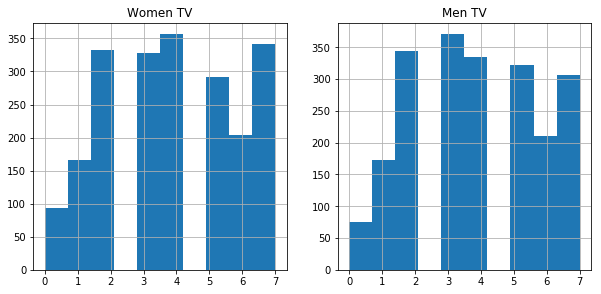

In [555]:
plt.figure(figsize=(10,10))
plt.subplot(221)
women.tvtot.hist()
plt.title('Women TV')
plt.subplot(222)
men.tvtot.hist()
plt.title('Men TV')

Text(0.5, 1.0, 'Men TV')

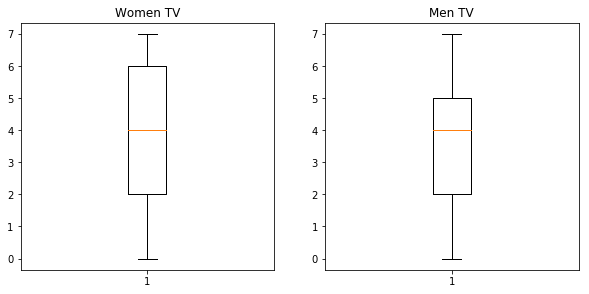

In [556]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.boxplot(women.tvtot)
plt.title('Women TV')
plt.subplot(222)
plt.boxplot(men.tvtot)
plt.title('Men TV')


([<matplotlib.axis.XTick at 0x20910b7a208>,
 <a list of 2 Text xticklabel objects>)

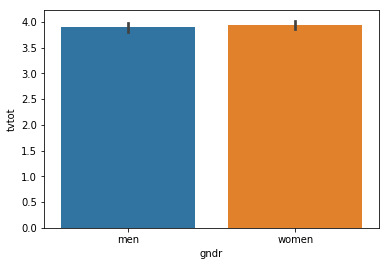

In [557]:
sns.barplot(_2012_df.gndr,_2012_df.tvtot)
plt.xticks((0,1),['men','women'])
 

In [558]:
_2012_df.groupby('gndr').tvtot.describe()

,count,mean,std,min,25%,50%,75%,max
gndr,,,,,,,,
1.0,2135.0,3.899297,1.984163,0.0,2.0,4.0,5.0,7.0
2.0,2114.0,3.934721,2.042959,0.0,2.0,4.0,6.0,7.0


From the plot and the statistics it look like women reported to watch more TV than men. To see if the difference is meaningful we need to do a significance test. The appropriate test here would be the ttest.

In [559]:
print(stats.ttest_ind(women.tvtot, men.tvtot))

Ttest_indResult(statistic=0.5733497229074147, pvalue=0.5664382816406328)


It appears that there is no significant difference in the reported time spent watching tv between men or women.

## <b> Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?


In [560]:
np.where(_2012_df.partner.isna())[0]

array([1173, 1365, 1794, 1941, 1989, 2894, 3114], dtype=int64)

In [561]:
_2012_df = _2012_df.drop(np.where(_2012_df.partner.isna())[0],0)
_2012_df.index = range(len(_2012_df))
_2012_df.partner.isna().sum()

0

In [562]:
np.where(_2012_df.pplfair.isna())[0]

array([ 398,  505,  636,  822,  893,  911, 1015, 1042, 1043, 1400, 1593,
       2331, 3349, 3779, 3801], dtype=int64)

In [563]:
_2012_df = _2012_df.drop(np.where(_2012_df.pplfair.isna())[0],0)
_2012_df.index = range(len(_2012_df))
_2012_df.pplfair.isna().sum()

0

In [564]:
partner = _2012_df[_2012_df.partner==1]
no_partner = _2012_df[_2012_df.partner==2]

Text(0.5, 1.0, 'No Partner People Trust')

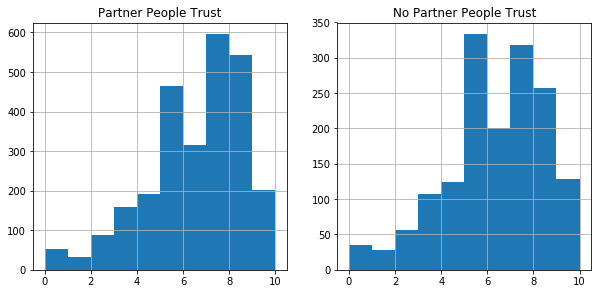

In [565]:
plt.figure(figsize=(10,10))
plt.subplot(221)
partner.pplfair.hist()
plt.title('Partner People Trust')
plt.subplot(222)
no_partner.pplfair.hist()
plt.title('No Partner People Trust')


Text(0.5, 1.0, 'No Partner People Fair')

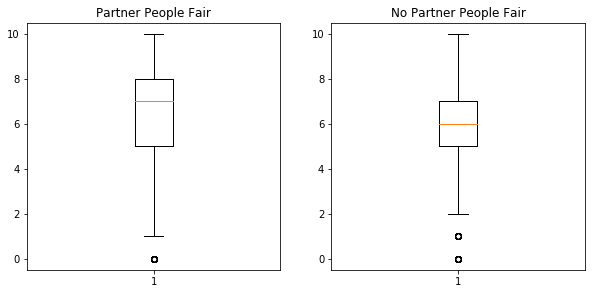

In [566]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.boxplot(partner.pplfair)
plt.title('Partner People Fair')
plt.subplot(222)
plt.boxplot(no_partner.pplfair) 
plt.title('No Partner People Fair')


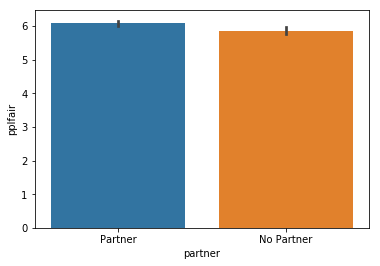

In [567]:
sns.barplot(_2012_df.partner,_2012_df.pplfair)
plt.xticks((0,1),['Partner','No Partner']) 
plt.show()

In [568]:
_2012_df.groupby('partner').pplfair.describe()

,count,mean,std,min,25%,50%,75%,max
partner,,,,,,,,
1.0,2641.0,6.075729,2.114421,0.0,5.0,7.0,8.0,10.0
2.0,1586.0,5.862547,2.162198,0.0,5.0,6.0,7.0,10.0


From the plot and the statistics it looks like people living with a partner find people to be more trusting in 2012 than people living without. To see if the difference is meaningful we need to do a significance test. Again, the appropriate test here would be the ttest.

In [569]:
print(stats.ttest_ind(partner.pplfair, no_partner.pplfair))


Ttest_indResult(statistic=3.1469250758191483, pvalue=0.0016614514019673593)


According to the ttest there is a significant difference between people who lived with an partner and people who lived without if they thought people were fair. People who live with a partner reported that they thought people were fair more that people who lived without a partner. 

## <b>Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?


In [594]:
print(es_df14.sclmeet.isna().sum())
print(se_df14.sclmeet.isna().sum())
print(ch_df14.sclmeet.isna().sum()) 

0
0
0


In [593]:
ch_df14.dropna(inplace=True)

(array([  2.,  26.,   0.,  53.,   0., 148., 136.,   0., 286.,  92.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

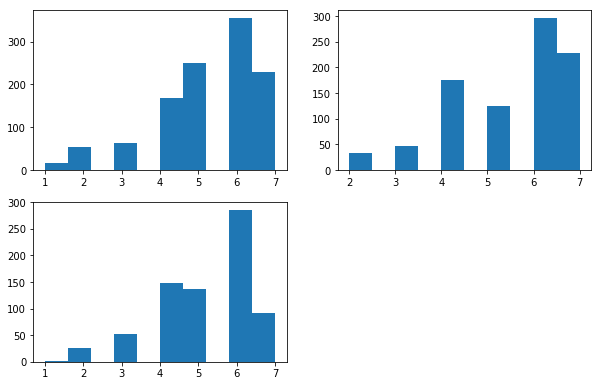

In [597]:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.hist(es_df14.sclmeet)
plt.subplot(322)
plt.hist(se_df14.sclmeet)
plt.subplot(323)
plt.hist(ch_df14.sclmeet )

In [625]:
print(stats.shapiro(es_df14.sclmeet))
print(stats.shapiro(se_df14.sclmeet))
print(stats.shapiro(ch_df14.sclmeet))

(0.8927679657936096, 2.280180298346974e-27)
(0.8801376819610596, 7.605776533189933e-26)
(0.8976361155509949, 7.658747353767709e-22)


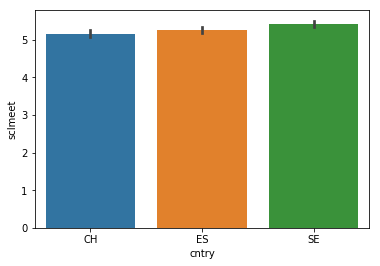

In [605]:
sns.barplot(cntry.cntry,cntry.sclmeet)
plt.show()

In [663]:
cntry.groupby('cntry').sclmeet.describe()

,count,mean,std,min,25%,50%,75%,max
cntry,,,,,,,,
CH,769.0,5.162549,1.309362,1.0,4.0,6.0,6.0,7.0
ES,1207.0,5.256835,1.468966,1.0,4.0,6.0,6.0,7.0
SE,902.0,5.423503,1.375310,2.0,4.0,6.0,7.0,7.0


By just looking at the stats it look as though Sweden stands out the most from Switzerland and Spain as people who report to meet more often socially. Since the data is non normal we'll use the non_parametric Kruskal_Wallace test to check if the differences are significant.

The country that stands out the most as a country of people who socially meet from the 3 is Sweden

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?